<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ** MNIST images **
1. Training set, validation set, test set.
2. Hot encoding by to_categorical() for classifying more than 2 




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number test images is not equal to number of labels"
#assert(X_train[1:] == (28,28)), "The dimensions of the images are not 28x28"
#assert(X_test[1:] == (28,28)), "The dimensions of the test images are not 28x28"

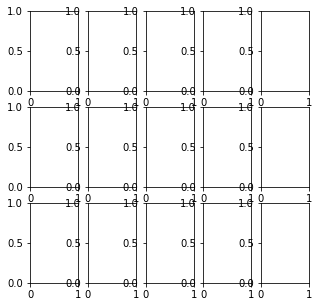

In [7]:
number_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=3, ncols=cols, figsize=(5,5))

1.   **Showing random MNIST images**
2.   **Classifying all images by BAR graph**



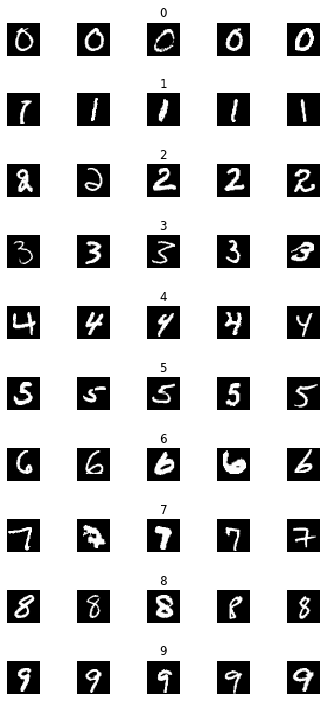

In [8]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
             axs[j][i].set_title(str(j))
             number_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

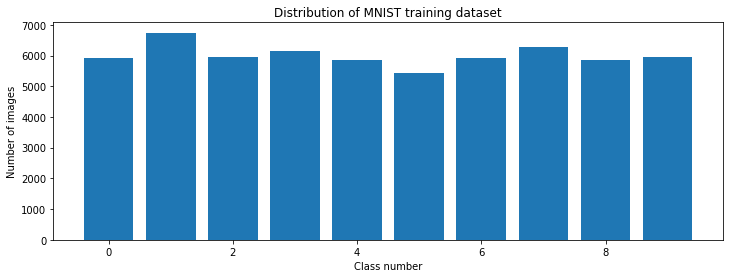

In [9]:
print(number_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), number_of_samples)
plt.title("Distribution of MNIST training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



1.   Normalizing image pixels to 0 and 1 instead of 0 to 255
2.   with 0 and 1 adjusting weights in neural networks becomes easy



In [0]:
X_train = X_train/255
X_test = X_test/255

In [12]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# **Neural Model**

1.   relu - Non linear
2.   Two Hidden layers




In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [14]:
model = create_model()
print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 6s 103us/step - loss: 0.5414 - acc: 0.8305 - val_loss: 0.2706 - val_acc: 0.9245
Epoch 2/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.3021 - acc: 0.9110 - val_loss: 0.2382 - val_acc: 0.9312
Epoch 3/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.2753 - acc: 0.9193 - val_loss: 0.2296 - val_acc: 0.9315
Epoch 4/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.2640 - acc: 0.9221 - val_loss: 0.2135 - val_acc: 0.9355
Epoch 5/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.2500 - acc: 0.9271 - val_loss: 0.2259 - val_acc: 0.9338
Epoch 6/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.2484 - acc: 0.9276 - val_loss: 0.2188 - val_acc: 0.9365
Epoch 7/10
54000/54000 [==

Text(0.5, 1.0, 'loss')

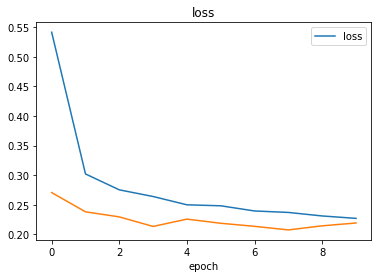

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

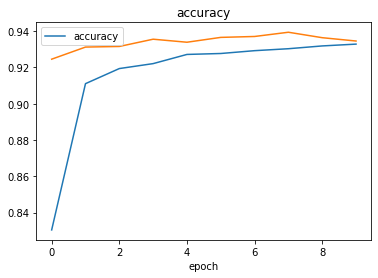

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score : ', score[0])
print('Test accuracy : ', score[1])

<class 'list'>
Test score :  0.26938771175444126
Test accuracy :  0.9222


Test accuracy is at 92%, which can be further improved by convolutional networks going forward.
